In [1]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
#import gridsearchcv
from sklearn.model_selection import GridSearchCV

In [5]:
bc = datasets.load_breast_cancer()
X = bc.data
y = bc.target
 
# Create training and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

params = {'C': [0.01, 0.1, 1, 10, 100], 'kernel': ['linear', 'rbf', 'poly', 'sigmoid']}

# Instantiate the Support Vector Classifier (SVC)
svc = SVC( random_state=1,)
cv = GridSearchCV(svc, params, cv=5)
cv.fit(X_train_std, y_train)

print('Best parameter: ', cv.best_params_)
print('Best score: ', cv.best_score_)
print('Test score: ', cv.score(X_test_std, y_test))

Best parameter:  {'C': 0.1, 'kernel': 'linear'}
Best score:  0.9824367088607595
Test score:  0.9707602339181286


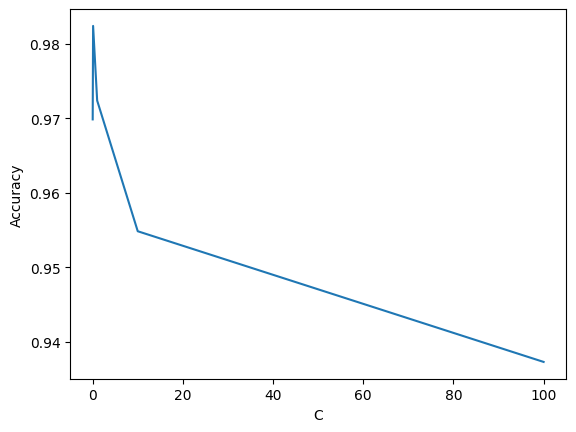

In [4]:
# plot the validation curve
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(params['C'], cv.cv_results_['mean_test_score'])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.show()

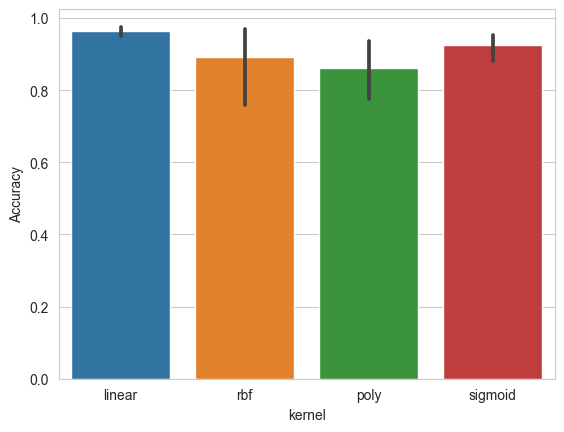

In [8]:
# kernel vs accuracy
import seaborn as sns
sns.set_style('whitegrid')
sns.barplot(x='param_kernel', y='mean_test_score', data=cv.cv_results_)
plt.xlabel('kernel')
plt.ylabel('Accuracy')
plt.show()